Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Salary Prediction of Data Professions.csv"
data = pd.read_csv(file_path)

## Exploratory Data Analysis

In [2]:
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [4]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [5]:
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

## Visualize the distribution of the target variable (SALARY)

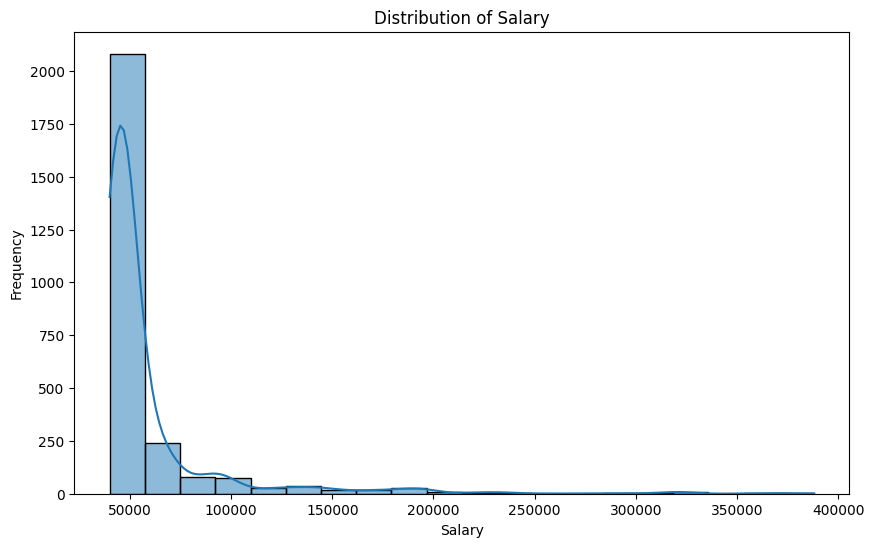

In [6]:
# Visualize the distribution of the target variable (SALARY)
plt.figure(figsize=(10, 6))
sns.histplot(data['SALARY'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Explore categorical variables
Visualize job role/designation distribution

Text(0.5, 0, 'Count')

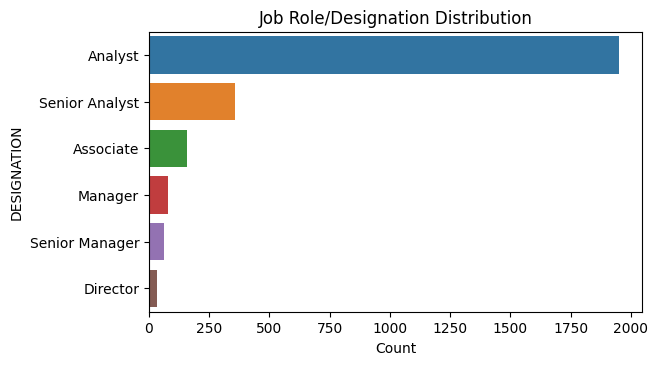

In [8]:
plt.figure(figsize=(14, 8))

# Visualize job role/designation distribution
plt.subplot(2, 2, 2)
sns.countplot(y=data['DESIGNATION'], order=data['DESIGNATION'].value_counts().index)
plt.title('Job Role/Designation Distribution')
plt.xlabel('Count')

## Visualize business unit or department distribution

Text(0.5, 0, 'Count')

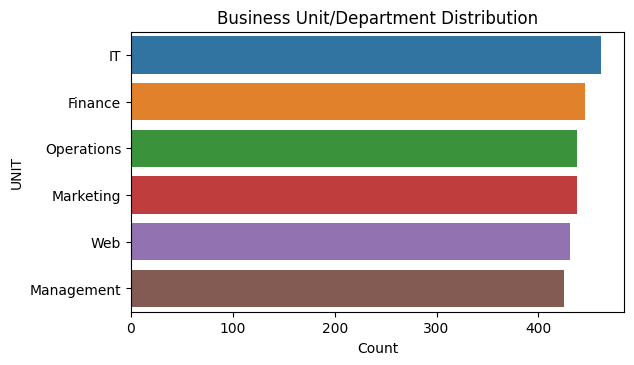

In [15]:
# Explore categorical variables
plt.figure(figsize=(14, 8))

# Visualize business unit or department distribution
plt.subplot(2, 2, 3)
sns.countplot(y=data['UNIT'], order=data['UNIT'].value_counts().index)
plt.title('Business Unit/Department Distribution')
plt.xlabel('Count')

# Visualize age distribution

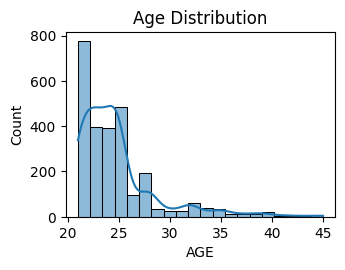

In [16]:
# Visualize age distribution
plt.subplot(2, 2, 4)
sns.histplot(data['AGE'], bins=20, kde=True)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

# Visualize the correlation matrix


<ipython-input-17-733c35fb2ab7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Text(0.5, 1.0, 'Correlation Matrix')

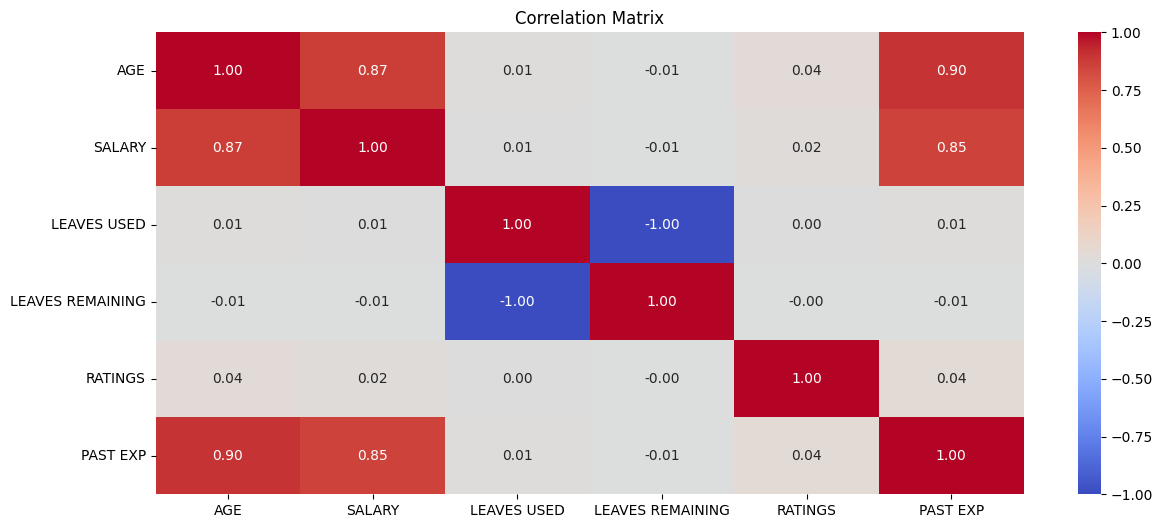

In [17]:
# Explore numerical variables
plt.figure(figsize=(14, 6))

# Visualize the correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

## Data Preprocessing

# Fill missing values in the 'AGE' column with the mean value

In [183]:
# Calculate the mean of the 'AGE' column
mean_age = data['AGE'].mean()

# Fill missing values in the 'AGE' column with the mean value
data['AGE'] = data['AGE'].fillna(mean_age)

In [184]:
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

# Features and target variable
One-hot encode categorical features ('SEX' and 'DESIGNATION')

Split the data into training and testing sets

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assume your dataset is named 'data'
# Features and target variable
features = ['AGE', 'PAST EXP', 'SEX', 'DESIGNATION']
X = data[features]
y = data['SALARY']

# One-hot encode categorical features ('SEX' and 'DESIGNATION')
X_encoded = pd.get_dummies(X, columns=['SEX', 'DESIGNATION'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Standardize the features

In [195]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Linear Regression model

In [194]:
from sklearn.linear_model import LinearRegression
# Train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 4624.142050914186
Mean Squared Error: 95687884.7290843
R-squared: 0.942375335238381


# Decision Tree Regressor


In [193]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree_model.predict(X_test_scaled)

# Evaluate Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor:")
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)


Decision Tree Regressor:
Mean Absolute Error: 4426.694171079231
Mean Squared Error: 130879404.01275586
R-squared: 0.9211824798741403


# Random Forest Regressor

In [192]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Random Forest Regressor:
Mean Absolute Error: 4441.369851766932
Mean Squared Error: 103189554.7342373
R-squared: 0.9378577181918435


# Gradient Boosting Regressor

In [198]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target variable
features = ['AGE', 'PAST EXP', 'SEX', 'DESIGNATION']
X = data[features]
y = data['SALARY']

# One-hot encode categorical features ('SEX' and 'DESIGNATION')
X_encoded = pd.get_dummies(X, columns=['SEX', 'DESIGNATION'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test_scaled)

# Evaluate Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)



Gradient Boosting Regressor:
Mean Absolute Error: 4530.116407659337
Mean Squared Error: 111729931.83304325
R-squared: 0.9327145763129122
